In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

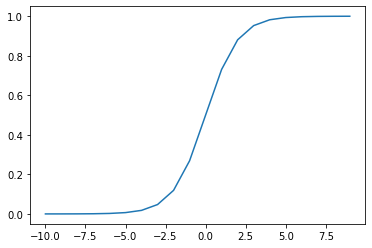

In [2]:
## Here is the logistic function, the activation function for logistic regression

def logistic(z):
    return 1/(1 + np.exp(-z))

x, fz = [], []
for z in range(-10, 10):
    x.append(z)
    fz.append(logistic(z))

plt.plot(x, fz)

1. What is the domain of the logistic function? 

The real line. $$(-\infty, \infty)$$

2. What is the range of the logistic function?

$$(0, 1)$$

3. Why do you think the logistic function might be a convenient activation function for modeling probabilities?

Probabilities range from 0 to 1

4. What is the denominator when z is very big? How about when z is very small?

The denominator approaches 1 when z is very large. 
The demoninator approaches 0 when z is very small.

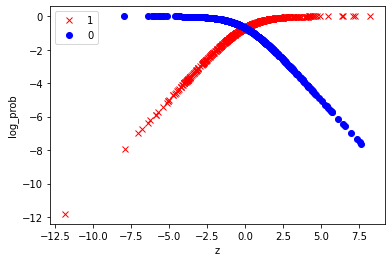

In [3]:
## Let's generate some features, weights and y values and compute the loss 
## This can help you build up intuition for what is happening

def log_prob(z, y_i):
    '''
    Returns the log_prob for one point
    '''
    fz = logistic(z)
    return y_i * np.log(fz) + (1 - y_i) * np.log(1 - fz)


out = []

dim_ = 10

for _ in range(1000):
    # generate some random weights 
    w = np.random.uniform(low=-2, high=2, size=dim_)
    
    # generate some random binary features 
    x = (np.random.rand(dim_) > .5).astype(int) 
    
    # get the z score
    z = w.dot(x)

    # randomly assign y
    y = 1 if random.random() < .5 else 0
    
    # compute the loss
    loss = log_prob(z=z, y_i=y)
    
    # keep track of what is happening
    out.append({"z": z, "loss": loss, "label": y})


# Plot the results
df = pd.DataFrame(out)
    
fig, ax = plt.subplots()
ax.plot(df[df["label"] == 1]["z"], df[df["label"] == 1]["loss"], 'x', color="red", label='1')
ax.plot(df[df["label"] == 0]["z"], df[df["label"] == 0]["loss"], 'o', color="blue", label='0')
plt.xlabel("z")
plt.ylabel("log_prob")
plt.legend()
plt.show()

5. What is the log_prob when y=1 and z=-.25? Why does that make sense?

-0.8259394198788435

6. What is the log_prob when y=0 and z=-.25? Why does that make sense?

-0.5759394198788437

7 . Why is the log_prob always negative? 

Probabilities are always between 0 and 1. The log of any number between 0 and 1 is negative.

In [4]:
log_prob(-0.25, 1)
log_prob(-0.25, 0)

-0.5759394198788437

In [9]:
def neg_log_likelihood(X, w, y):
    '''Compute the negative log likelihood'''
    L = 0
    for _x,_y in zip(X, y):
        z = w.dot(_x)
        L += log_prob(z=z, y_i=_y)
    return -1 * L


def fast_logistic(X, w):
    '''Compute the logistic function over many data points'''
    return 1/(1 + np.exp(-1 * X.dot(w)))


def grad(X, w, y):
    '''Return the gradient'''
    grad = np.zeros_like(w)
    for _x,_y in zip(X, y):
        fz = logistic(w.dot(_x))
        grad += _x * (_y - fz)
    return grad    


def grad_ascent(X, y, eta = .0001, tolerance=1e-4, verbose=True):
    '''
    - Perform gradient ascent
    - This function is basically the same as in the Adeline notebook
    - Of course, the gradient is different, because it is a different function
    '''
    w = np.random.rand(dim_)
    last = 0
    for i in range(1000):
        this_ll = neg_log_likelihood(X, w, y)
#         if verbose:
#             print("iter: {}, neg ll: {}, accuracy: {}".format(i, this_ll, accuracy(X, w, y)))
        if(abs(this_ll - last) < tolerance): break
        last = this_ll
        w += eta * grad(X, w, y)
    return w

def prediction(X, w, threshold=.5):
    '''
    - Return a Boolean array of length N.
    - The array should be True if the weights dotted with the features for a given instance is greater than .5
    '''
    N, D = X.shape
    fz = fast_logistic(X, w)
    preds = fz > threshold
    
    return preds

def accuracy(X, w, y):
    '''
    Return a value between 0 and 1, showing the fraction of data points which have been classified correctly
    '''
    preds = (prediction(X, w) == y)
    return sum(preds) / preds.shape
    pass

def init_data(N, dim_):
    '''
    Initialize data. Note how we generate y below. We know how the data is generated.
    We should be able to 
    '''
    w = np.random.uniform(low=-2, high=2, size=dim_)
    X = (np.random.rand(dim_ * N) > .5).astype(int)
    X = X.reshape(N, dim_)
    
    
    z_ = X[:,0] * 2 +  X[:,1] * -2 +  X[:,2] * 3 + X[:,3] * 4

    y =  1/(1 + np.exp(-1 * z_)) > .5
    
    print(z_.shape)
    
    return X, y

N = 10000
dim_ = 4
X, y = init_data(N, dim_)
w = grad_ascent(X, y, eta=.0001, tolerance=5, verbose=True)

# TODO: 
# This code implements gradient ascent for logistic regression
# Code the accuracy and prediction functions to complete the implementation
# Your accuracy should go up as the negative LL goes down
# Use the slides as a reference to understand how to implement the prediction function
# When you are done, go to the final question in the notebook

(10000,)


In [6]:
w

array([ 0.94450251, -1.63918077,  3.55332722,  3.59425111])

Look closely at the `init_data` function, especially at how the function uses the `z_` variable to fill the values of the labels `y`. Then look at the weights `w` learned during training. Do you notice anything about the signs of the weights `w` and the coefficients in the equation filling `z_`? Do you have any ideas about why that might be the case?

The weights have the same sign as the inital weight multiplier in the z_ calculation. 
